In [1]:
%matplotlib widget

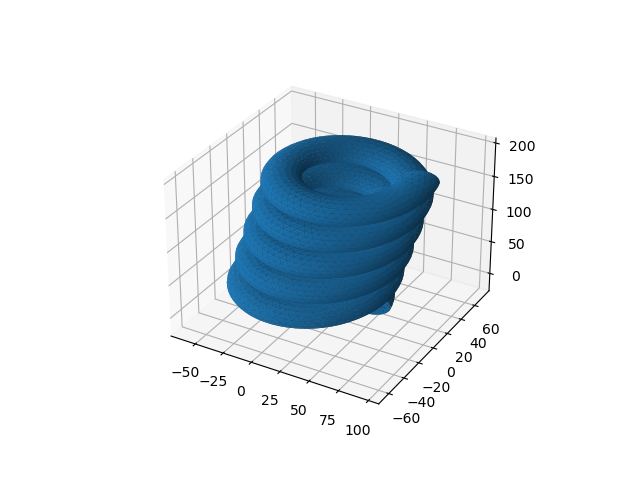

In [2]:
#  geometría
from fenics import *
mesh = Mesh("helice.xml")
plot(mesh)

In [3]:
deltat = 0.1 
total_time = 25.0
k = 250 # coeficiente de difusividad térmica

In [4]:
#  espacio funcional
V = FunctionSpace(mesh, "P", 1)

In [5]:
# Leer el archivo para las superficies
caras = MeshFunction('size_t', mesh, "helice_facet_region.xml")

In [6]:
# condiciones de borde
u_entrada = 40
u_salida = -40

bc1 = DirichletBC(V, Constant(u_entrada), caras, 14)
bc2 = DirichletBC(V, Constant(u_salida), caras, 15)
bc = [bc1, bc2]

In [7]:
#  formulación variacional
u = TrialFunction(V)
v = TestFunction(V)
un = Function(V)

Helice = u*v*dx +  deltat*k*dot(grad(u), grad(v))*dx  - un*v*dx

a = lhs(Helice)
l = rhs(Helice)

In [8]:
vtkfile = File('solucion_helice/helice.pvd')
u = Function(V)
t = 0

num_iter = int(total_time/deltat)
for n in range(num_iter):
    solve(a == l, u, bc)
    un.assign(u)
    vtkfile << (u, t)
    t += deltat

Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational problem.
Solving linear variational p